# Programming Assignment 1 — Backpropagation

Author: Clay Curry

This notebook demonstrates curve fitting using feed forward neural networks regressing over a data set produced by a polynomial function.

Our ANN topology consists of 1 input neuron, 2 hidden layers, 1 output neuron.

## Backpropagation and Optimization
Training a neural network by backpropogation amounts to an optimization problem, where the goal is to update the weights so to minimize a loss function. A dual way of stating this is that we wish to maximize our objective function (in specific domains, this may be called a reward function, a fitness function, a profit function, etc.). 

Loss is a way to measure how well the algorithm performs on the task it is learning. It is very import to select a loss function that is consistent with the quantity we wish to minimize. In this demonstration, we will use the following loss function.

$L$ = **Mean Squared Error(MSE)**


#### Convexity of MSE
MSE is a member of a special class of continuous functions called the **convex functions**. In other words, the plot is bowl-shaped and has one minimum. This is important due to the following analytical properties:
- bowl-shaped $\implies$ $\partial L / \partial t$ is strictly non-positive (greedy solution will not get trapped in a local minimum nor saddle point)
- one minimum $\implies$ $\partial L / \partial t = \mathbf{0} \iff t = \text{argmin} \{L\}$

It can be shown that the composition of two convex functions is convex. Therefore, the plot of loss vs. weight will always be convex as long as the activation functions are convex. 

## Backpropagation and Gradient Descent
Gradient descent is an iterative stragegy for selecting optimal weights. The strategy of GD is to simply update the weights in such a way that minimizes the next loss. Backpropogation is a particular algorithm that follows the gradient.


# Keras Implementation

We will select 500 samples along the interval $[-5, 5]$.

In [5]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt


# Generate data
from sklearn.model_selection import train_test_split
import math
SAMPLE_SIZE=500
signal = lambda x:x**4 - 22*x**2
x = np.random.uniform(-5, 5, SAMPLE_SIZE).reshape(-1,1)
y = signal(x) + np.random.normal(0,20, SAMPLE_SIZE).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/math.e)

# normalize input
y_scale = max(np.abs(y))
y_train = y_train / y_scale

Loss function: **Mean Squared Error**

Optimizer: **Stochastic Gradient Descent**

Activation function: **ReLU**

In [6]:
# Define a network and fit it

model = keras.Sequential([
    keras.layers.Dense(20, activation ="relu", input_dim=1),
    keras.layers.Dense(20,activation = "relu",input_dim=20),
    keras.layers.Dense(1)
])
model.summary()

model.compile(loss='mean_squared_error',optimizer='SGD')
history = model.fit(x_train,y_train,validation_split = 1/math.e, batch_size=10, epochs=500)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                40        
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
14/20 [====================>.........] - ETA: 0s - loss: 0.3589

2022-04-26 07:43:04.709942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-26 07:43:04.884802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 0s 10ms/step - loss: 0.2781 - val_loss: 0.1079
Epoch 2/500
20/20 [==============================] - 0s 6ms/step - loss: 0.0976 - val_loss: 0.0957
Epoch 3/500
20/20 [==============================] - 0s 6ms/step - loss: 0.0982 - val_loss: 0.0961
Epoch 4/500
20/20 [==============================] - 0s 6ms/step - loss: 0.0907 - val_loss: 0.0980
Epoch 5/500
20/20 [==============================] - 0s 6ms/step - loss: 0.0967 - val_loss: 0.0940
Epoch 6/500
20/20 [==============================] - 0s 6ms/step - loss: 0.0951 - val_loss: 0.0958
Epoch 7/500
20/20 [==============================] - 0s 7ms/step - loss: 0.0936 - val_loss: 0.0953
Epoch 8/500
20/20 [==============================] - 0s 6ms/step - loss: 0.0932 - val_loss: 0.0979
Epoch 9/500
20/20 [==============================] - 0s 6ms/step - loss: 0.0933 - val_loss: 0.0955
Epoch 10/500
20/20 [==============================] - 0s 6ms/step - loss: 0.0948 - val_loss: 0.0962
Epoch 11/500
20/20 [

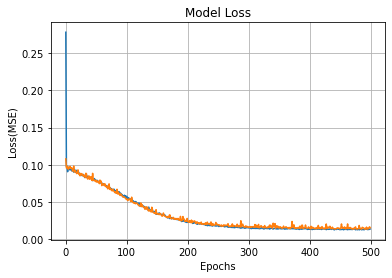

In [7]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss(MSE)')

plt.grid(True)
plt.show()

2022-04-26 07:44:00.317296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


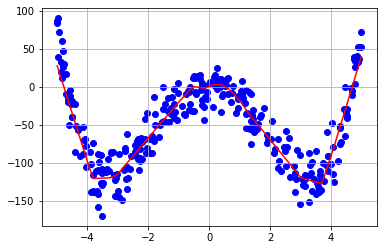

Mean Squared error on test set: [522.70469316]


In [8]:
x_pred = np.sort(x_test, axis=0)
y_pred = model.predict(x_pred)
y_train = y_scale * y_train
y_pred = y_scale * y_pred
plt.plot(x_pred, y_pred, c="red", label='prediction')
plt.scatter(x_train, y_train, c='blue', label='training data')
plt.grid(True)
plt.show()


#Verifying MSE
predictions = model.predict(x_test) * y_scale
MSE = 0
n = 0
for y_hat,y_pred in zip(y_test,predictions):
    MSE+=(y_hat-y_pred)**2
    n+=1
MSE = MSE/n
print("Mean Squared error on test set: {}".format(MSE))